# Import libraries

In [1]:
%matplotlib inline
from importlib import reload
import utils; reload(utils)
from utils import *

Using cuDNN version 5105 on context None
Preallocating 2867/4095 Mb (0.700000) on cuda0
Mapped name None to device cuda0: GeForce GTX 650 (0000:01:00.0)
Using Theano backend.


In [2]:
%matplotlib inline

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import dicom
import os
import scipy.ndimage
import matplotlib.pyplot as plt
import datetime
import multiprocessing as mp
import pickle
from functools import reduce

from skimage import measure, morphology, color
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Set constants

In [13]:
data_path = '/Volumes/Backups/data/kaggle2017/labeledcolorclass1/'

In [8]:
ls -lh /Volumes/Backups/data/kaggle2017/labeledcolorclass1/0015ceb851d7251b8f399e39779d1e7d

total 0
drwxr-xr-x  4 rungsunan  staff   170B Apr  7 09:41 0015ceb851d7251b8f399e39779d1e7d_0x512x512x3.bc/
drwxr-xr-x  4 rungsunan  staff   170B Apr  7 09:41 0015ceb851d7251b8f399e39779d1e7d_100x512x512x3.bc/
drwxr-xr-x  4 rungsunan  staff   170B Apr  7 09:41 0015ceb851d7251b8f399e39779d1e7d_101x512x512x3.bc/
drwxr-xr-x  4 rungsunan  staff   170B Apr  7 09:41 0015ceb851d7251b8f399e39779d1e7d_102x512x512x3.bc/
drwxr-xr-x  4 rungsunan  staff   170B Apr  7 09:41 0015ceb851d7251b8f399e39779d1e7d_103x512x512x3.bc/
drwxr-xr-x  4 rungsunan  staff   170B Apr  7 09:41 0015ceb851d7251b8f399e39779d1e7d_104x512x512x3.bc/
drwxr-xr-x  4 rungsunan  staff   170B Apr  7 09:41 0015ceb851d7251b8f399e39779d1e7d_105x512x512x3.bc/
drwxr-xr-x  4 rungsunan  staff   170B Apr  7 09:41 0015ceb851d7251b8f399e39779d1e7d_106x512x512x3.bc/
drwxr-xr-x  4 rungsunan  staff   170B Apr  7 09:41 0015ceb851d7251b8f399e39779d1e7d_107x512x512x3.bc/
drwxr-xr-x  4 rungsunan  staff   170B Apr  7 09:41 0015ceb851d7251b8f399e397

# Read in data

In [173]:
i = 0
# image3d_list = list()
# for patient_name in (os.listdir(data_path)):

def load_3d_image(patient_name):
    patient_dir = data_path + patient_name + '/'
    print (patient_dir)
        
    def load_slice(i):
        slice_name = (patient_dir + patient_name +'_'+ str(i) +'x512x512x3.bc')
#         print(slice_name)
        return np.transpose(color.gray2rgb(load_array(slice_name)), (2,0,1))

    num_slices = len(os.listdir(patient_dir))
    return np.stack(map(load_slice, range(num_slices))) # np.array
    
%time image3d_list = list(map(load_3d_image, os.listdir(data_path)[0:10]))    
    
    
    
#     i += 1
#     if i > 0:
#         break


/Volumes/Backups/data/kaggle2017/labeledcolorclass1/0015ceb851d7251b8f399e39779d1e7d/
/Volumes/Backups/data/kaggle2017/labeledcolorclass1/006b96310a37b36cccb2ab48d10b49a3/
/Volumes/Backups/data/kaggle2017/labeledcolorclass1/008464bb8521d09a42985dd8add3d0d2/
/Volumes/Backups/data/kaggle2017/labeledcolorclass1/00edff4f51a893d80dae2d42a7f45ad1/
/Volumes/Backups/data/kaggle2017/labeledcolorclass1/0257df465d9e4150adef13303433ff1e/
/Volumes/Backups/data/kaggle2017/labeledcolorclass1/02801e3bbcc6966cb115a962012c35df/
/Volumes/Backups/data/kaggle2017/labeledcolorclass1/028996723faa7840bb57f57e28275e4c/
/Volumes/Backups/data/kaggle2017/labeledcolorclass1/04a8c47583142181728056310759dea1/
/Volumes/Backups/data/kaggle2017/labeledcolorclass1/05609fdb8fa0895ac8a9be373144dac7/
/Volumes/Backups/data/kaggle2017/labeledcolorclass1/059d8c14b2256a2ba4e38ac511700203/
CPU times: user 7.02 s, sys: 8.5 s, total: 15.5 s
Wall time: 20.9 s


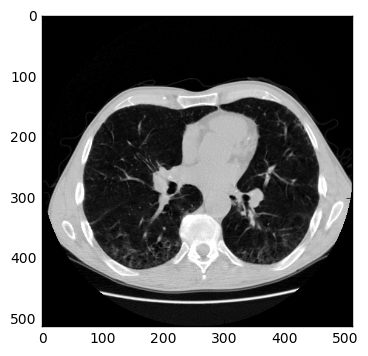

In [174]:
plt.imshow(np.transpose(image3d_list[0][100], (1,2,0))/255)

In [178]:
image3d = image3d_list[0]

In [179]:
nSlice = 100

In [180]:
# Shift size in x and y directions
dxy = np.int32((image3d[0].shape[1]-100) / (np.ceil((image3d[0].shape[1]-100+1) / (100/2)))) # For 244: patches: 0-99, 48-147, 96-195, 144-243

In [181]:
nPatches = np.int32(np.ceil((image3d[0].shape[1]-100+1) / (100/2)) + 1)

In [182]:
nPatches, dxy

(10, 45)

In [192]:
ix=5; iy=3

In [ ]:
slice2d = image3d[nSlice]

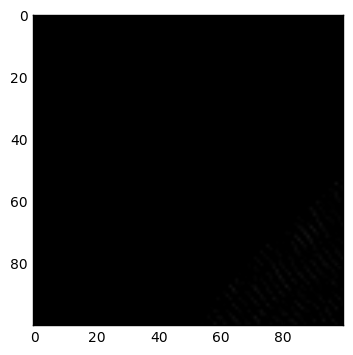

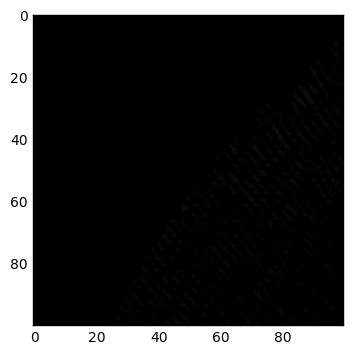

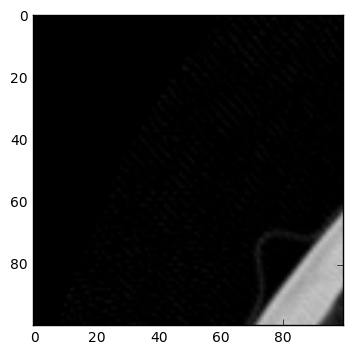

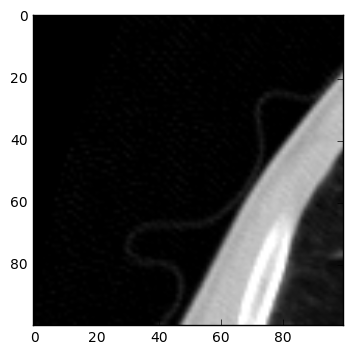

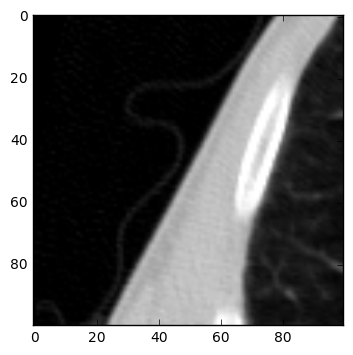

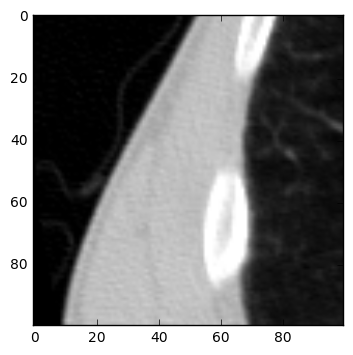

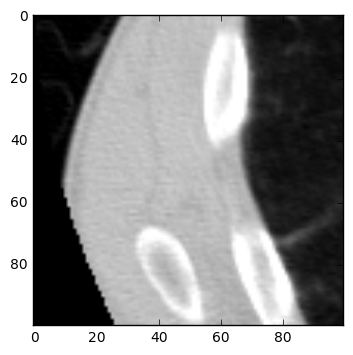

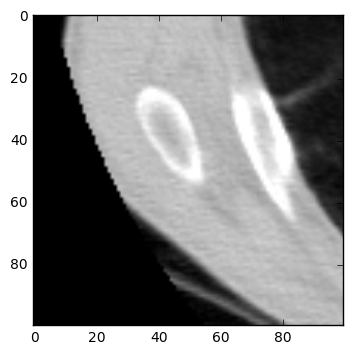

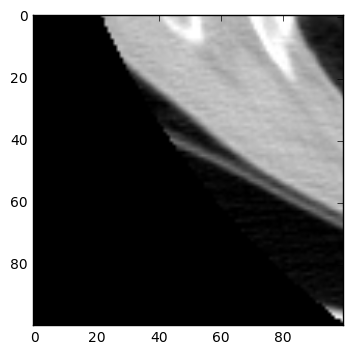

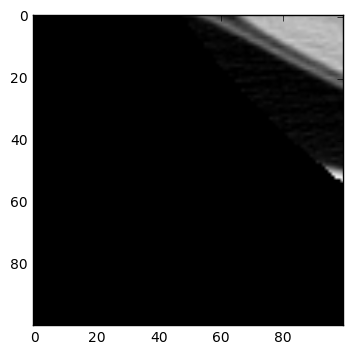

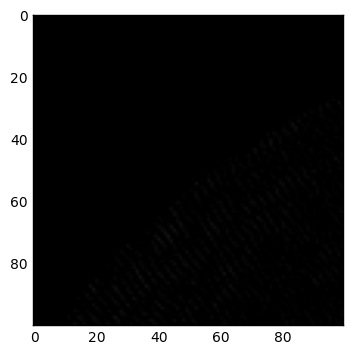

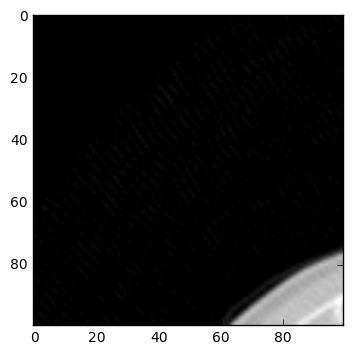

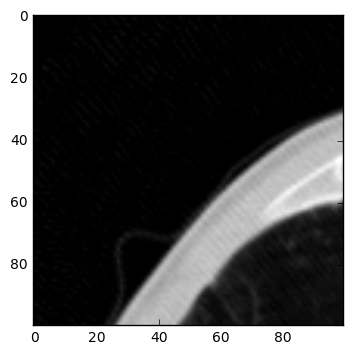

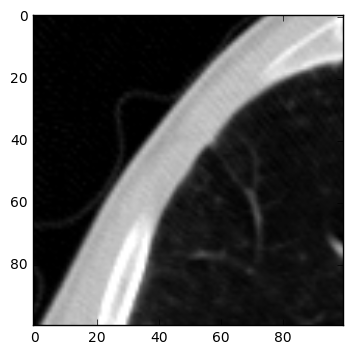

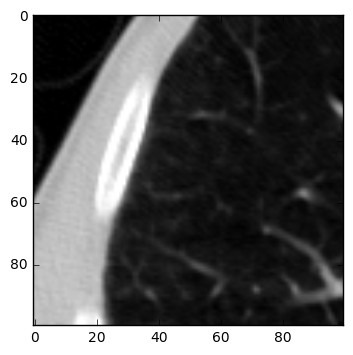

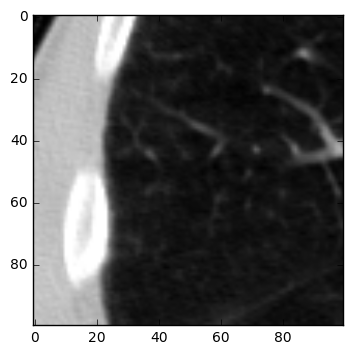

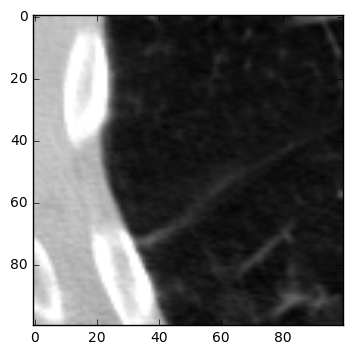

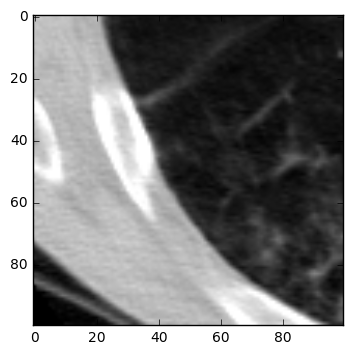

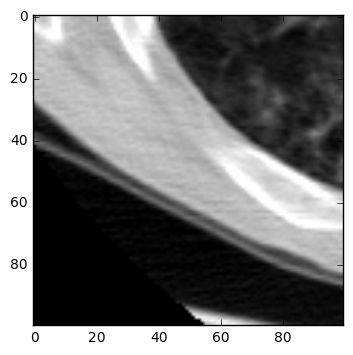

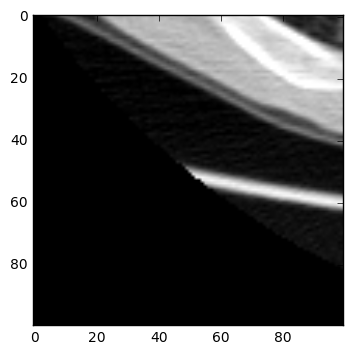

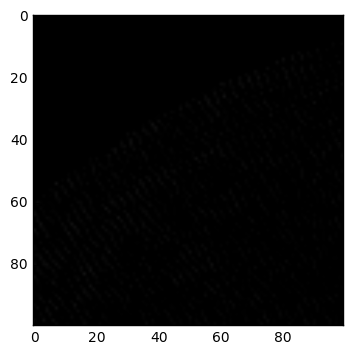

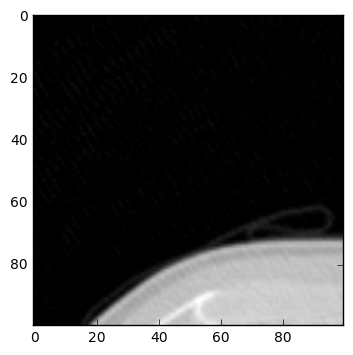

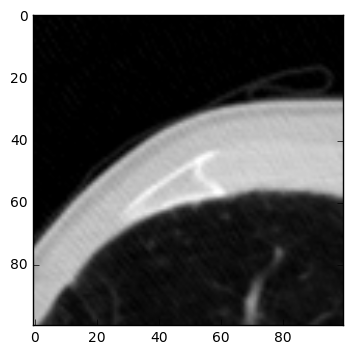

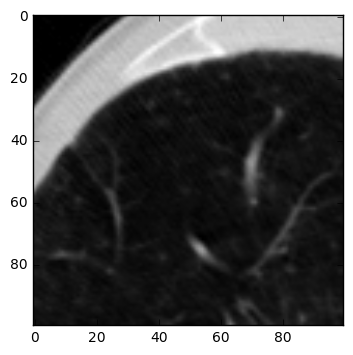

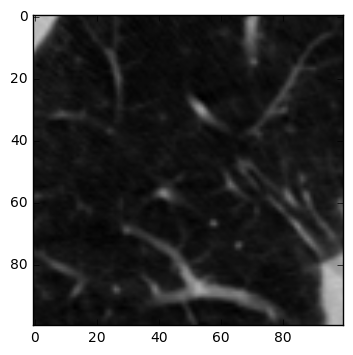

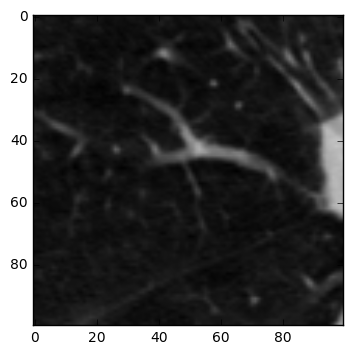

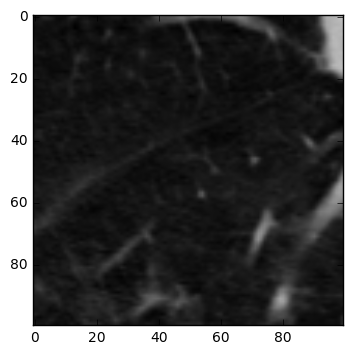

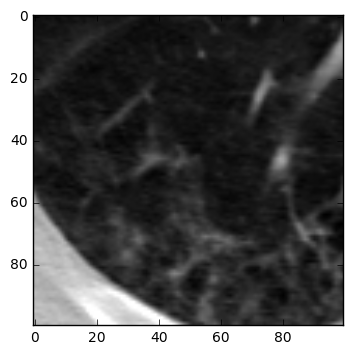

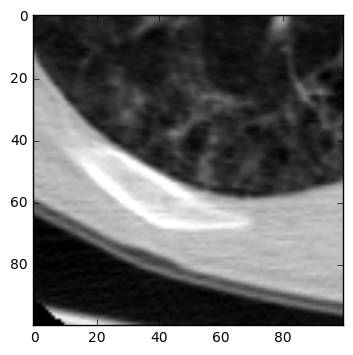

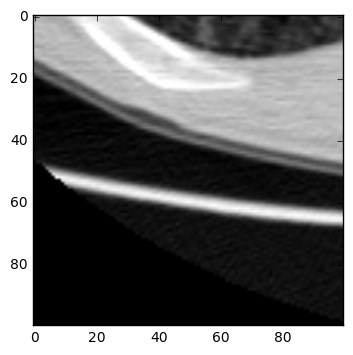

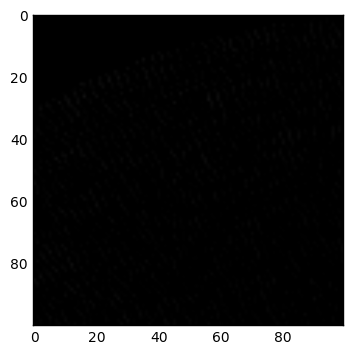

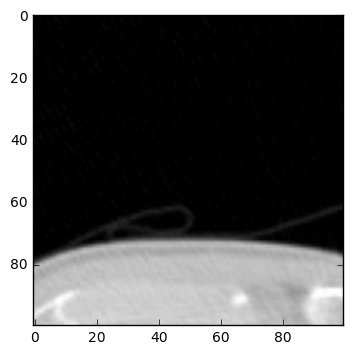

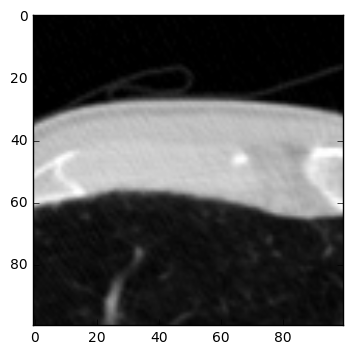

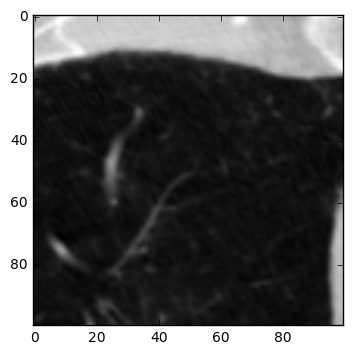

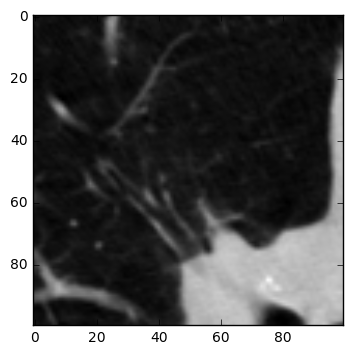

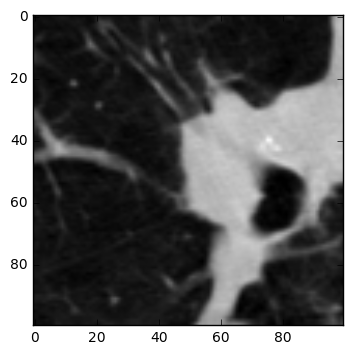

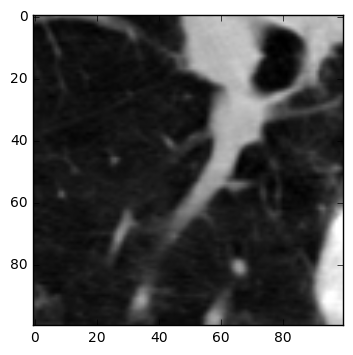

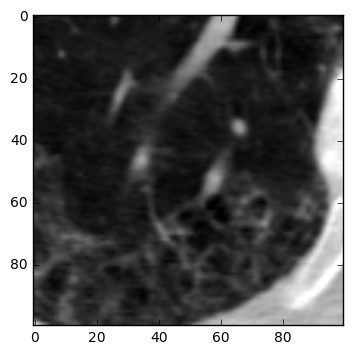

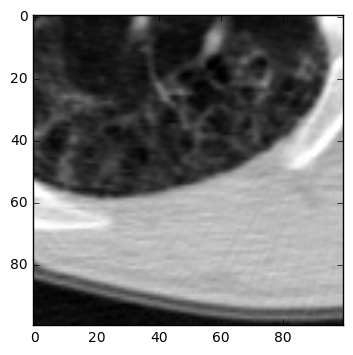

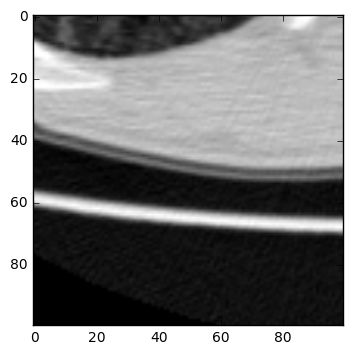

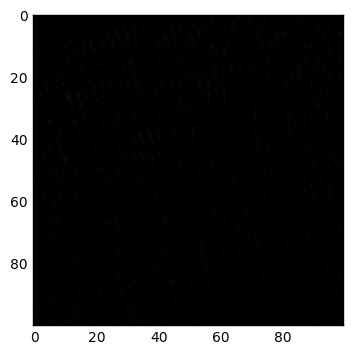

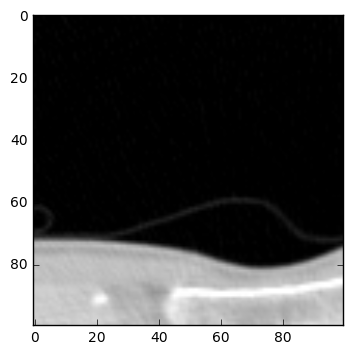

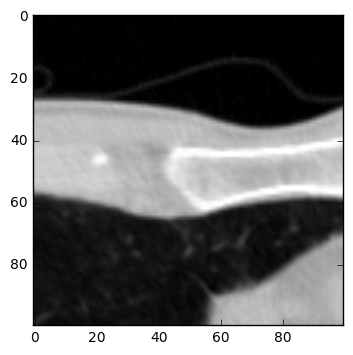

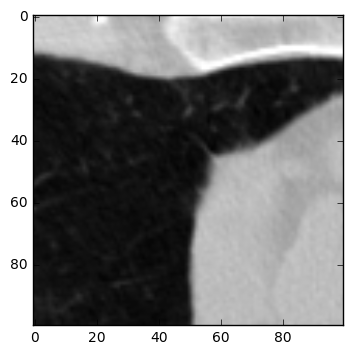

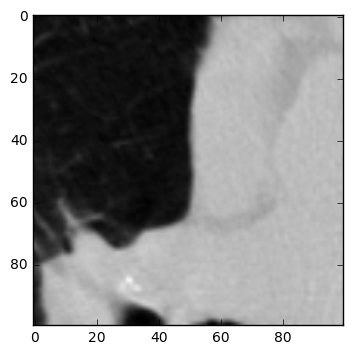

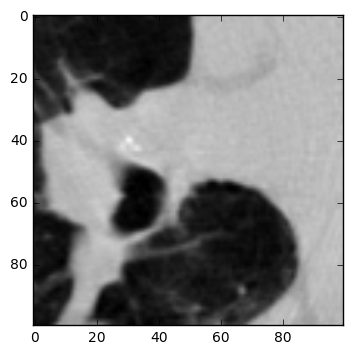

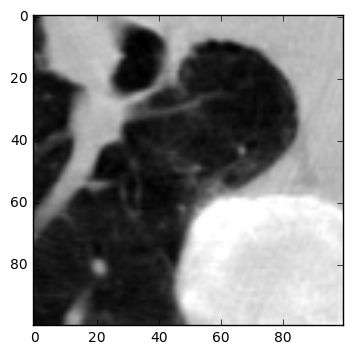

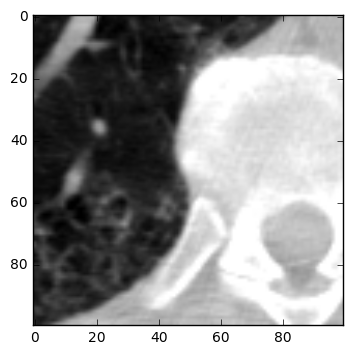

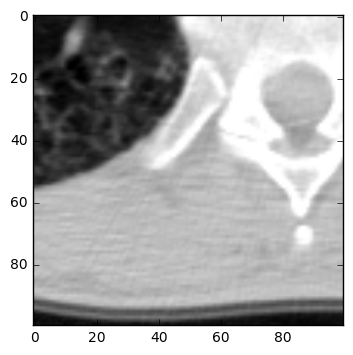

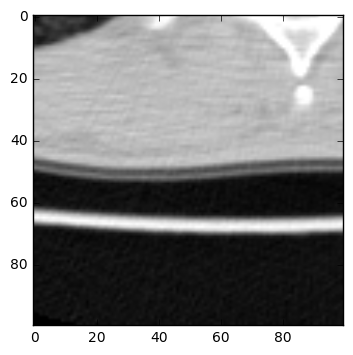

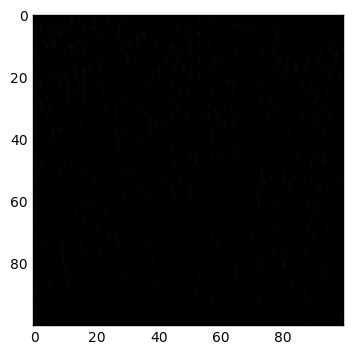

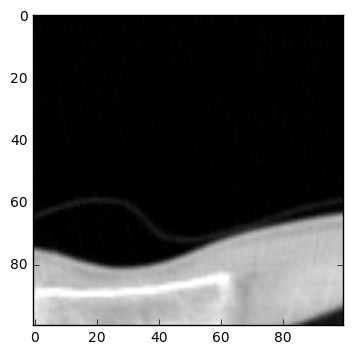

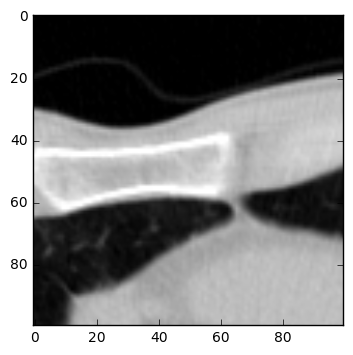

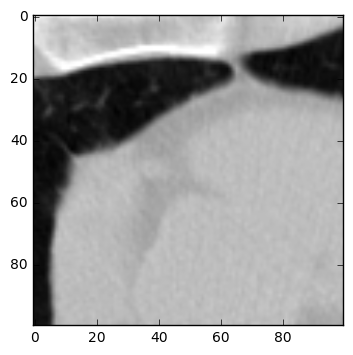

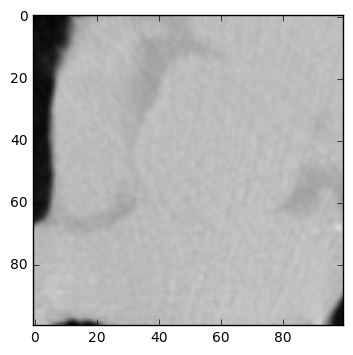

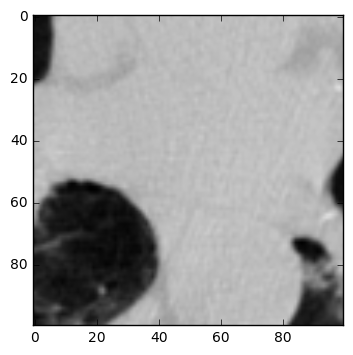

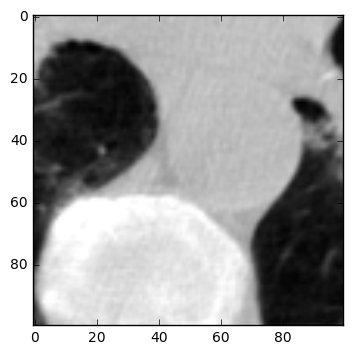

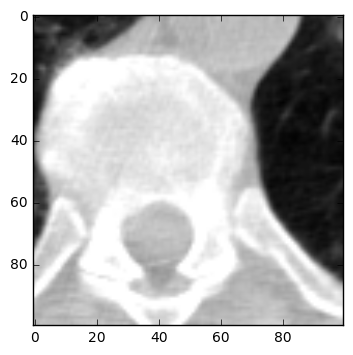

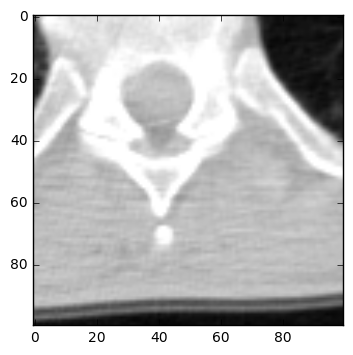

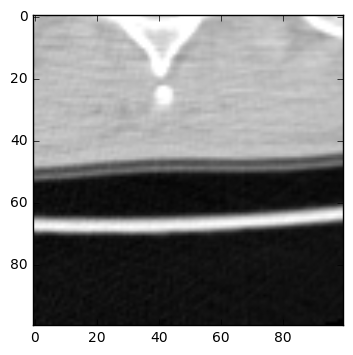

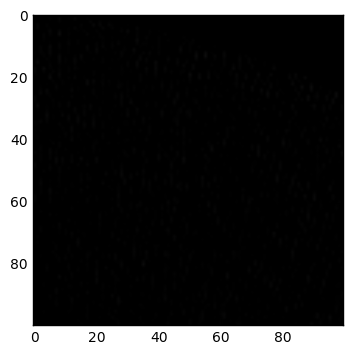

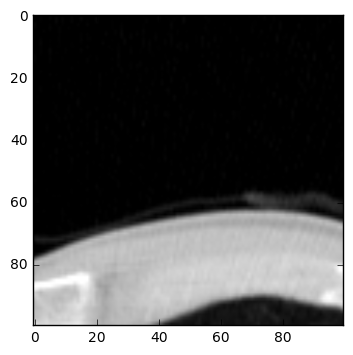

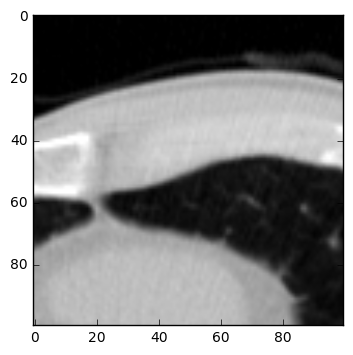

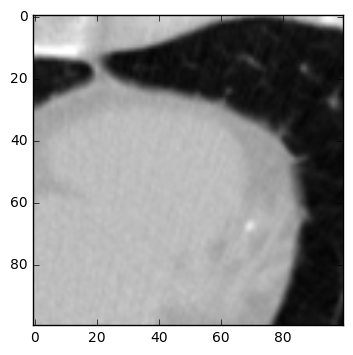

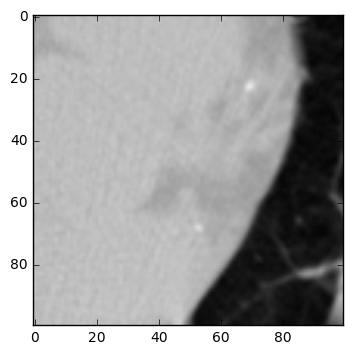

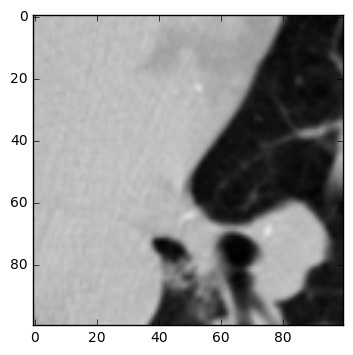

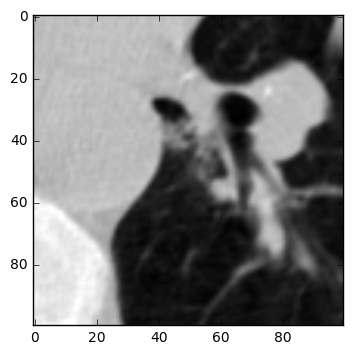

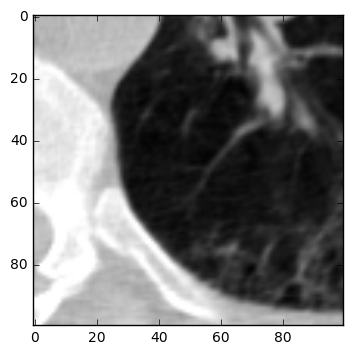

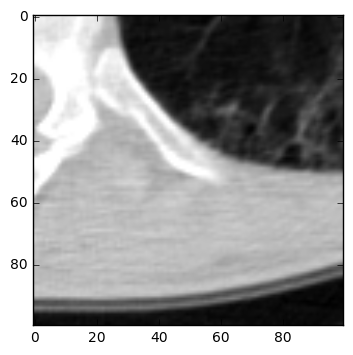

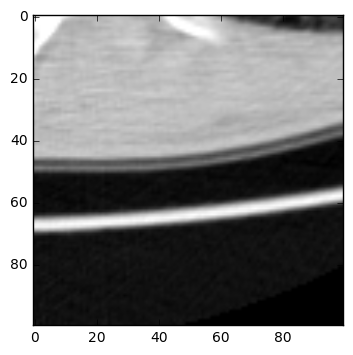

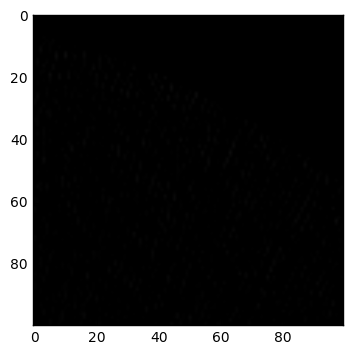

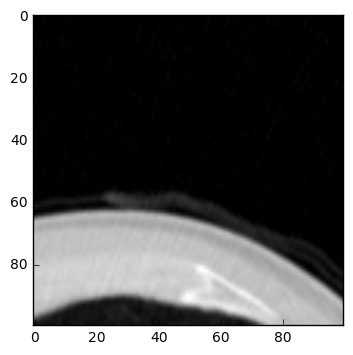

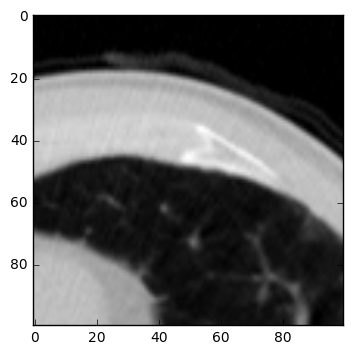

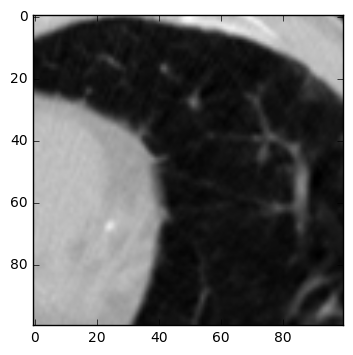

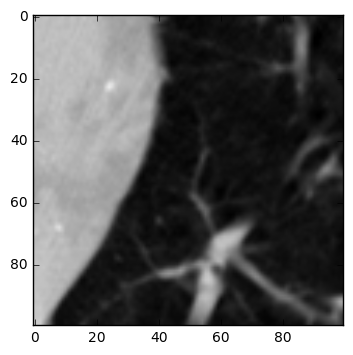

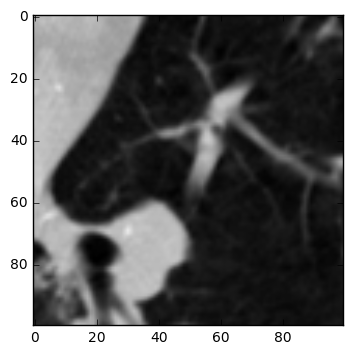

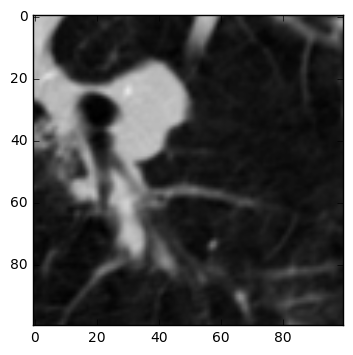

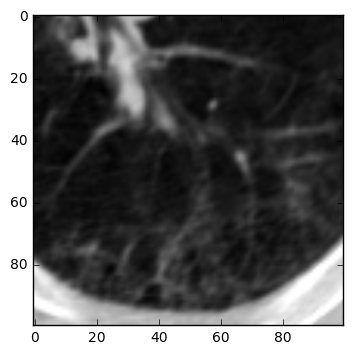

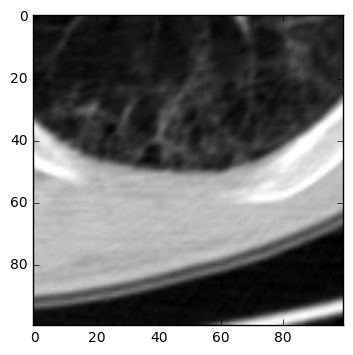

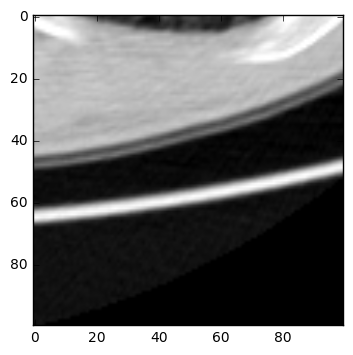

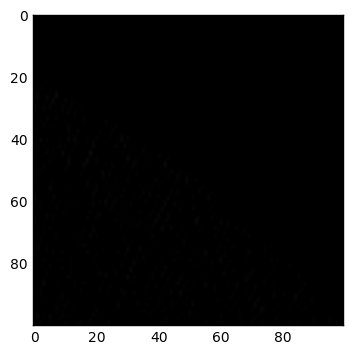

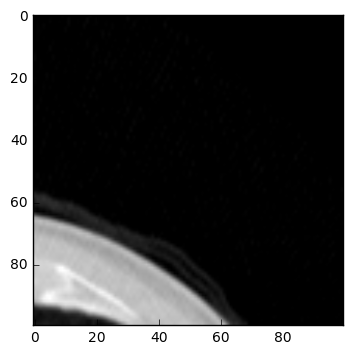

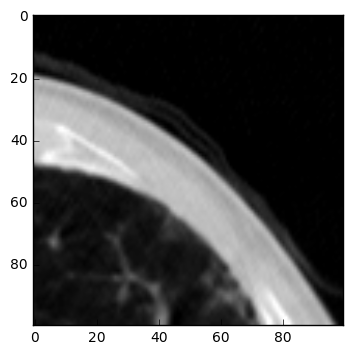

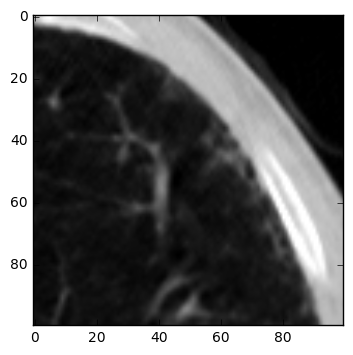

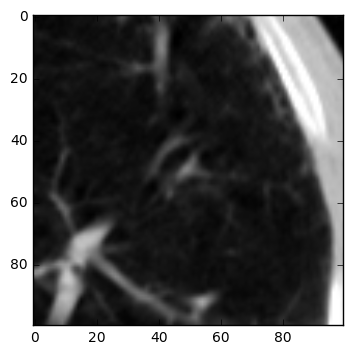

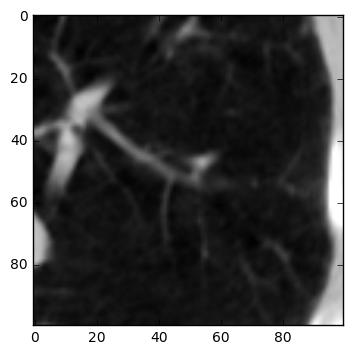

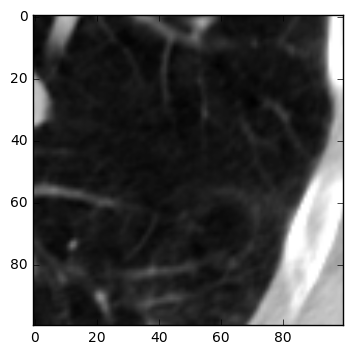

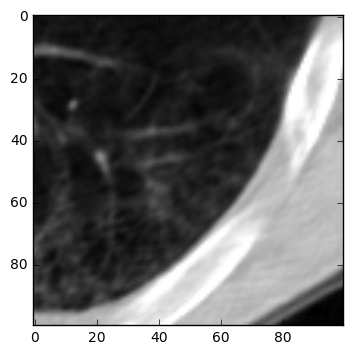

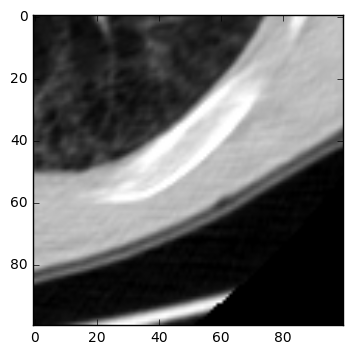

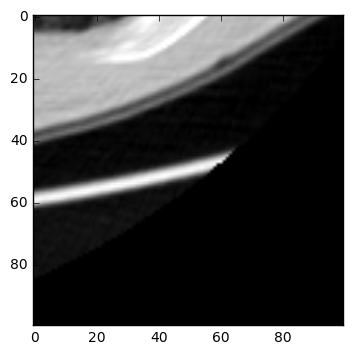

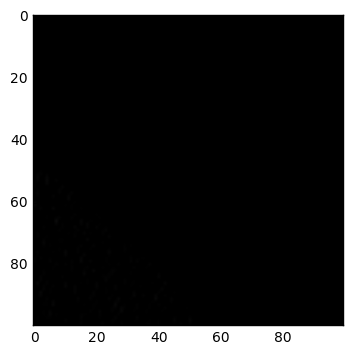

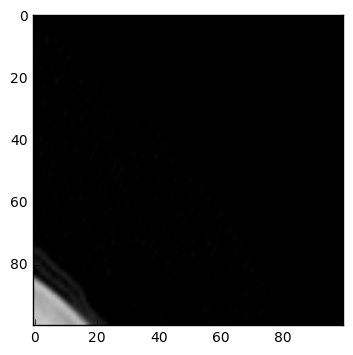

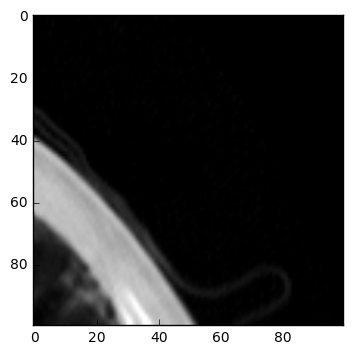

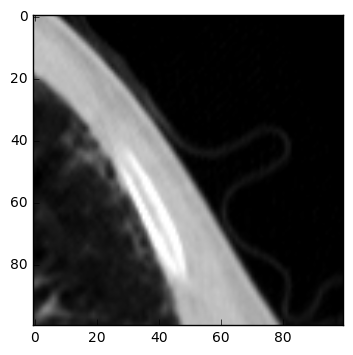

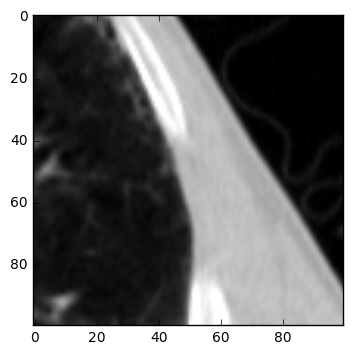

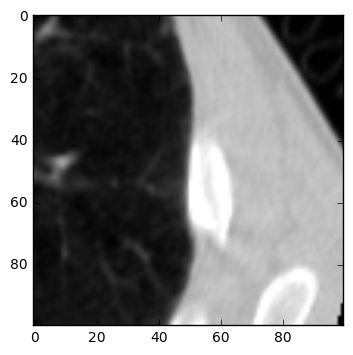

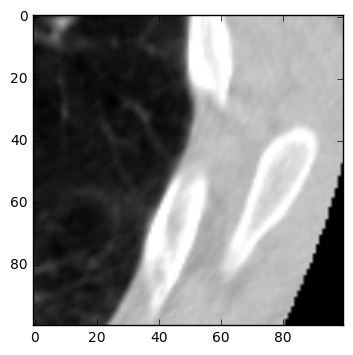

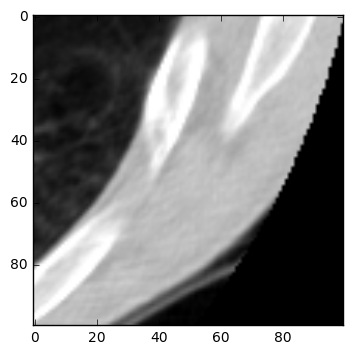

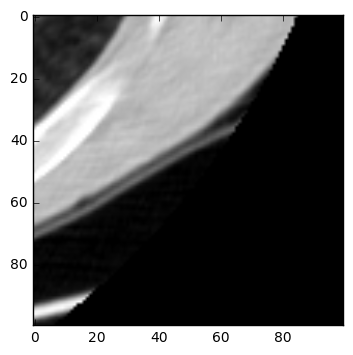

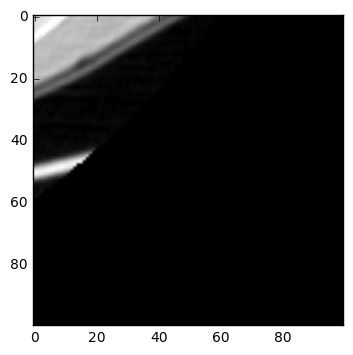

In [195]:
for ix in range(nPatches):
    for iy in range(nPatches):
        patch = slice2d[:, iy*dxy:iy*dxy+100, ix*dxy:ix*dxy+100]
        plt.imshow(np.transpose(patch, (1,2,0))/255)
        plt.show()

# Load vgg model

In [175]:
from vgg16bn import Vgg16BN
vgg100 = Vgg16BN((100,100)).model

/Users/rungsunan/anaconda/envs/py35/lib/python3.5/site-packages/keras/layers/core.py:577: UserWarning: `output_shape` argument not specified for layer lambda_2 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 3, 100, 100)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))


In [176]:
vgg100.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_2 (Lambda)                (None, 3, 100, 100)   0           lambda_input_2[0][0]             
____________________________________________________________________________________________________
zeropadding2d_14 (ZeroPadding2D) (None, 3, 102, 102)   0           lambda_2[0][0]                   
____________________________________________________________________________________________________
convolution2d_14 (Convolution2D) (None, 64, 100, 100)  1792        zeropadding2d_14[0][0]           
____________________________________________________________________________________________________
zeropadding2d_15 (ZeroPadding2D) (None, 64, 102, 102)  0           convolution2d_14[0][0]           
___________________________________________________________________________________________

In [197]:
vgg100.compile(optimizer=Adam(1e-3),
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [198]:
conv_layers,fc_layers = split_at(vgg100, Convolution2D)

In [203]:
conv_model = Sequential(conv_layers)

# FC model

In [234]:
nf=512; p=0.6

In [235]:
def get_fc_layers():
    return [
        MaxPooling2D(input_shape=conv_layers[-1].output_shape[1:]),
        BatchNormalization(axis=1),
        Dropout(p/4.),
        Flatten(),
        Dense(nf, activation='relu'),
        BatchNormalization(),
        Dropout(p),
        Dense(nf, activation='relu'),
        BatchNormalization(),
        Dropout(p/2.),
        Dense(2, activation='softmax'),
    ]


In [236]:
lrg_model = Sequential(get_fc_layers())

In [237]:
lrg_model.input_shape, lrg_model.output_shape

((None, 512, 6, 6), (None, 2))

In [320]:
lrg_model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
maxpooling2d_11 (MaxPooling2D)   (None, 512, 3, 3)     0           maxpooling2d_input_1[0][0]       
____________________________________________________________________________________________________
batchnormalization_1 (BatchNorma (None, 512, 3, 3)     2048        maxpooling2d_11[0][0]            
____________________________________________________________________________________________________
dropout_1 (Dropout)              (None, 512, 3, 3)     0           batchnormalization_1[0][0]       
____________________________________________________________________________________________________
flatten_1 (Flatten)              (None, 4608)          0           dropout_1[0][0]                  
___________________________________________________________________________________________

In [321]:
lrg_model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [322]:
weights_dir = '/Volumes/Backups/data/LUNA16/weights'

In [323]:
lrg_model.load_weights(weights_dir + 'vgg100x100-fc-2layer-nd512-p0d6-samplesize=16351-val_acc=0d9379.h5')

# Predict

In [302]:
slice2d = image3d[:]

In [303]:
slice2d.shape

(195, 3, 512, 512)

In [247]:
ix=0; iy=0 #ix=5; iy=3

In [339]:
ix=5; iy=3
y0 = iy*dxy
y1 = iy*dxy+100
x0 = ix*dxy
x1 = ix*dxy+100
print((x0,x1,y0,y1))
patch = slice2d[:,:, y0:y1, x0:x1]
# patch.shape
%time conv_ftrs = conv_model.predict(patch)
pred = lrg_model.predict(conv_ftrs)


(225, 325, 135, 235)
CPU times: user 4.52 s, sys: 20 ms, total: 4.54 s
Wall time: 4.56 s


In [343]:
pred.shape

(195, 2)

In [344]:
type(pred[1][1])

numpy.float32

In [341]:
pred.sum(axis=1)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.

(array([ 183.,    3.,    5.,    1.,    1.,    1.,    0.,    1.,    0.,    0.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

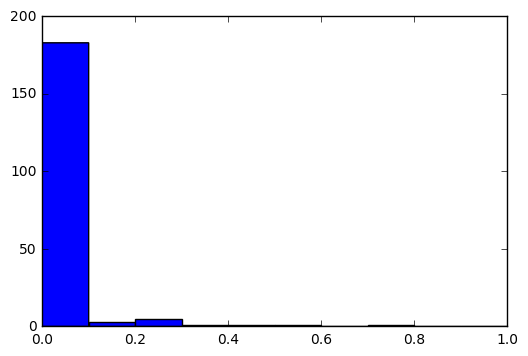

In [342]:
plt.hist(pred[:,1],range=(0,1))

In [297]:
# def fny(y):
#     def fnx(x):
#         y0 = y*dxy
#         y1 = y*dxy+100
#         x0 = x*dxy
#         x1 = x*dxy+100
#         print((x0,x1,y0,y1))
#         patch = slice2d[:,:, y0:y1, x0:x1]
#         # patch.shape
#         %time conv_ftrs = conv_model.predict(patch)
#         return lrg_model.predict(conv_ftrs)
# #         return predX
#     predY = np.stack(map(fnx, range(3,5)))
#     return predY
# %time pred10x10 = np.stack(map(fny, range(5,7)))

(135, 235, 225, 325)
CPU times: user 4.54 s, sys: 12.5 ms, total: 4.55 s
Wall time: 4.55 s
(180, 280, 225, 325)
CPU times: user 4.53 s, sys: 8.41 ms, total: 4.54 s
Wall time: 4.55 s
(135, 235, 270, 370)
CPU times: user 4.53 s, sys: 8.44 ms, total: 4.53 s
Wall time: 4.55 s
(180, 280, 270, 370)
CPU times: user 4.53 s, sys: 8.39 ms, total: 4.54 s
Wall time: 4.55 s
CPU times: user 18.2 s, sys: 47 ms, total: 18.3 s
Wall time: 18.3 s


In [298]:
pred10x10.shape # (y,x,z,onehot)

(2, 2, 195, 2)

(array([ 195.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

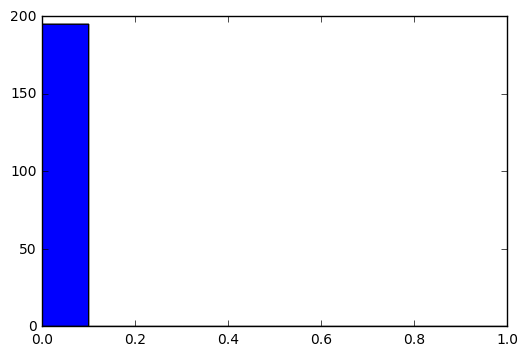

In [306]:
plt.hist(pred[:,1].flatten(), range=(0,1))

In [289]:
pred.shape # (y,x,z,onehot)

(195, 2)

(array([ 188.,    2.,    1.,    2.,    1.,    1.,    0.,    0.,    0.,    0.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

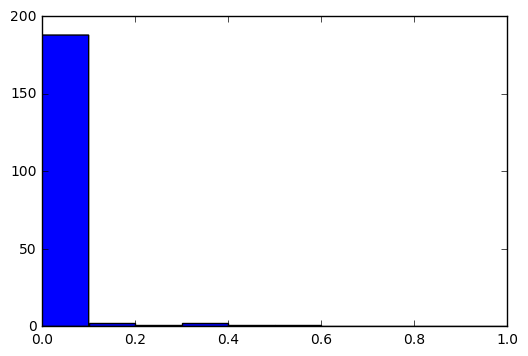

In [290]:
plt.hist(pred[:,1].flatten(), range=(0,1))

(array([ 195.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

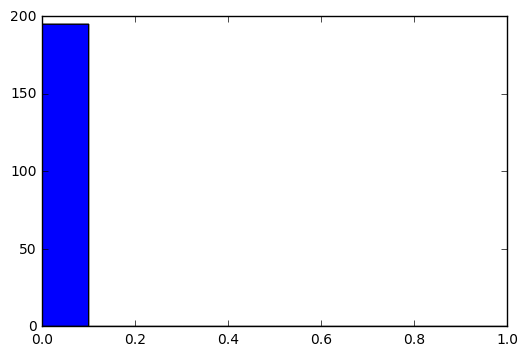

In [265]:
plt.hist(pred[0,0,:,1],range=(0,1))

In [230]:
pred.shape

(195, 512, 6, 6)

In [359]:
pred10x10for = np.zeros(shape=(nPatches,nPatches,195,2), dtype=np.float32)
j=0
for y in range(nPatches):
    i=0
    for x in range(nPatches):
        y0 = y*dxy
        y1 = y*dxy+100
        x0 = x*dxy
        x1 = x*dxy+100
        print((x0,x1,y0,y1))
        patch = slice2d[:,:, y0:y1, x0:x1]
        # patch.shape
        %time conv_ftrs = conv_model.predict(patch)
        pred = lrg_model.predict(conv_ftrs)
        print(pred.shape)
        pred10x10for[j,i,:,:] = pred
        i+=1
    j+=1

(0, 100, 0, 100)
CPU times: user 4.18 s, sys: 39.7 ms, total: 4.22 s
Wall time: 4.59 s
(195, 2)
(45, 145, 0, 100)
CPU times: user 4.26 s, sys: 35.9 ms, total: 4.29 s
Wall time: 4.58 s
(195, 2)
(90, 190, 0, 100)
CPU times: user 4.38 s, sys: 30.1 ms, total: 4.41 s
Wall time: 4.55 s
(195, 2)
(135, 235, 0, 100)
CPU times: user 4.4 s, sys: 23.6 ms, total: 4.43 s
Wall time: 4.62 s
(195, 2)
(180, 280, 0, 100)
CPU times: user 3.99 s, sys: 23.4 ms, total: 4.02 s
Wall time: 4.59 s
(195, 2)
(225, 325, 0, 100)
CPU times: user 4.46 s, sys: 19.6 ms, total: 4.48 s
Wall time: 4.55 s
(195, 2)
(270, 370, 0, 100)
CPU times: user 4.4 s, sys: 22.1 ms, total: 4.42 s
Wall time: 4.55 s
(195, 2)
(315, 415, 0, 100)
CPU times: user 4.47 s, sys: 17.6 ms, total: 4.49 s
Wall time: 4.56 s
(195, 2)
(360, 460, 0, 100)
CPU times: user 4.47 s, sys: 19.2 ms, total: 4.49 s
Wall time: 4.55 s
(195, 2)
(405, 505, 0, 100)
CPU times: user 4.47 s, sys: 18.7 ms, total: 4.49 s
Wall time: 4.55 s
(195, 2)
(0, 100, 45, 145)
CPU time

(array([ 16883.,    951.,    484.,    306.,    234.,    182.,    149.,    106.,    106.,     99.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

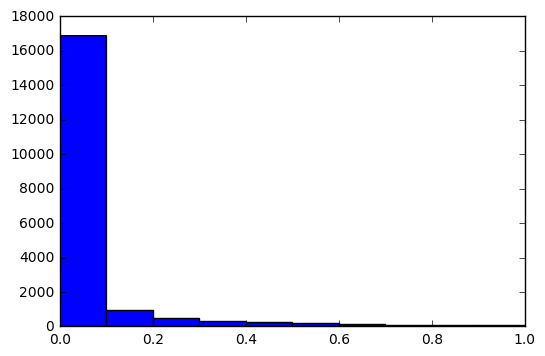

In [360]:
plt.hist(pred10x10for[:,:,:,1].flatten(), range=(0,1))

In [361]:
pred10x10for[:,:,:,1].flatten().max()

1.0

In [319]:
pred10x10for.shape

(10, 10, 195, 2)

In [ ]:
lrg_model.predict